# ***Data Modelling***

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Cleaned_Data_Pricing.csv')

In [4]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Price,Transaction
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,New_Property
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,New_Property
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Resale
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Resale
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,New_Property


Below we create the dummies for two ***categorical*** columns as we need it in training but can't be directly used in object data type. So it convert each categorical value into column with bool values.


In [11]:
df = pd.get_dummies(df, columns=['Furnishing', 'Transaction'])

In [13]:
df.head()

,Area,BHK,Bathroom,Locality,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Transaction_New_Property,Transaction_Resale
0,800.0,3,2.0,Rohini Sector 25,6500000,False,True,False,True,False
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,False,True,False,True,False
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,True,False,False,False,True
3,600.0,2,2.0,Rohini Sector 24,4200000,False,True,False,False,True
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,6200000,False,True,False,True,False


Here model creation begin


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Since we do not require the locality in training, that is why we drop the column. And testing is only to be done on prices

In [15]:
train=df.drop(['Locality'], axis=1)
test=df['Price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

In [27]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
pred=reg.predict(X_test)

In [29]:
pred

array([1.49e+07, 2.55e+07, 7.80e+06, 5.25e+07, 1.95e+06, 3.50e+07,
       5.25e+07, 1.10e+08, 4.50e+06, 1.85e+07, 5.89e+06, 4.20e+06,
       6.50e+07, 6.00e+06, 1.15e+07, 4.00e+07, 1.85e+06, 8.40e+06,
       6.50e+06, 8.50e+06, 6.50e+06, 7.50e+06, 1.52e+07, 3.50e+06,
       2.00e+07, 5.25e+07, 6.00e+07, 3.15e+07, 1.50e+07, 5.80e+06,
       4.50e+06, 8.55e+06, 1.50e+07, 4.00e+06, 2.00e+07, 2.30e+06,
       7.15e+07, 3.80e+06, 2.80e+06, 1.50e+07, 1.25e+07, 4.10e+06,
       1.95e+07, 7.50e+07, 2.09e+07, 1.45e+07, 5.53e+07, 5.90e+06,
       6.50e+06, 8.50e+07, 7.00e+07, 6.50e+07, 1.00e+07, 2.49e+07,
       5.50e+06, 1.25e+07, 1.40e+07, 8.70e+06, 2.10e+07, 6.00e+06,
       1.05e+07, 5.00e+06, 5.60e+06, 1.65e+07, 1.66e+07, 3.40e+06,
       4.50e+06, 1.85e+07, 8.30e+06, 7.02e+06, 5.50e+06, 2.00e+06,
       2.70e+07, 2.35e+06, 1.58e+07, 7.30e+06, 3.00e+06, 3.50e+06,
       1.75e+07, 1.72e+07, 5.25e+07, 5.80e+06, 1.00e+07, 5.70e+06,
       1.50e+07, 6.00e+07, 3.80e+06, 1.85e+07, 2.15e+07, 2.90e

Since the dataset was too small for a model, the prediction score is 1.0 that means its 100% correct, which might not be true on big data.

In [30]:
reg.score(X_test, y_test)

1.0

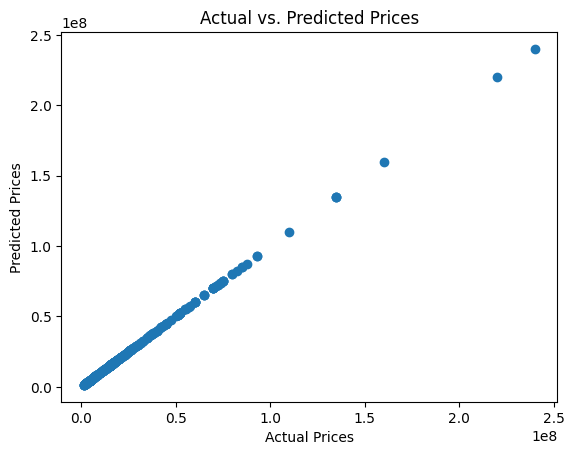

In [32]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()